In [10]:
import pandas as pd
import requests
import matplotlib.pyplot as plt

In [121]:

r = requests.get('http://localhost:8000/api/merger/transactions/?page=1&page_size=5000')
j = r.json()['results']

df = pd.json_normalize(j)
df['date'] = pd.to_datetime(df.date, format='%Y-%m-%d')
df

,id,date,description,account,amount,calculated_amount,category.id,category.name,category.variant,category
0,2,2023-04-12,"ŁUKASZ BLACHNICKI, PRZELEW ŚRODKÓW UL.STEFANA ...",Prywatne 8811 ... 3099,-150000,-150000,21.0,Transfer,IGN,NaN
1,1,2023-04-12,"JAKUB SEREDYŃSKI, SPOTIFY 09.2020-04.2023 RACŁ...",Prywatne 8811 ... 3099,-18600,-18600,3.0,Subscriptions,NEG,NaN
2,4,2023-04-11,Stacja Grawitacja Cz-wa ZAKUP PRZY UŻYCIU KART...,Prywatne 8811 ... 3099,-1500,-1500,1.0,Sport,NEG,NaN
3,3,2023-04-11,Bistro Czestochowa ZAKUP PRZY UŻYCIU KARTY W K...,Prywatne 8811 ... 3099,-1400,-1400,8.0,Going out,NEG,NaN
4,5,2023-04-11,WIKTORIA BLACHNICKA UL. BATOREGO 27 M.3 42-202...,Prywatne 8811 ... 3099,150000,150000,19.0,Donation,POS,NaN
...,...,...,...,...,...,...,...,...,...,...
270,309,2023-01-02,Przelew z DM mBanku MBANK S.A. UL.PROSTA 18 00...,Prywatne 8811 ... 3099,4290,4290,13.0,Interest,POS,NaN
271,308,2023-01-02,IN TEAM SPÓŁKA Z OGRANICZONĄ ODPOWIEDZIALNOŚCI...,Prywatne 8811 ... 3099,792139,792139,12.0,Salary,POS,NaN
272,310,2023-01-01,Allegro ZAKUP PRZY UŻYCIU KARTY - INTERNET,Prywatne 8811 ... 3099,-1889,-1889,15.0,Car,NEG,NaN
273,312,2023-01-01,PRZELEW NA TWOJE CELE ŁUKASZ BLACHNICKI UL.STE...,Prywatne 8811 ... 3099,-1,-1,21.0,Transfer,IGN,NaN


In [122]:
expenses = df[df['calculated_amount'] < 0]
expenses = expenses.groupby(['category.name'], as_index=False).sum()
expenses = expenses[expenses['category.name'] != 'Transfer']


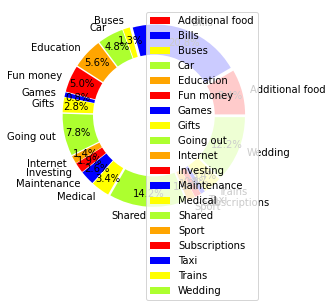

0     137645
1     342363
2      21050
3      78219
4      92778
5      81698
6      13847
7      45493
8     128204
9      23682
10     31000
11     43498
12     56331
13    234000
14     24200
15     19750
16     12922
17     55672
19    200000
Name: calculated_amount, dtype: int64

In [123]:
# Setting size in Chart based on
# given values
sizes = expenses['calculated_amount'] * (-1)

# Setting labels for items in Chart
labels = expenses['category.name']

# colors
colors = ['#FF0000', '#0000FF', '#FFFF00', '#ADFF2F', '#FFA500']

# explosion
explode = [0.05 for x in expenses['calculated_amount']]

# Pie Chart
plt.pie(sizes, colors=colors, labels=labels,
        autopct='%1.1f%%', pctdistance=0.85,
        explode=explode)

# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()

# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)

# Add Legends
plt.legend(labels)

# Displaying Chart
plt.show()
sizes

In [127]:
expenses_by_date = df[df['calculated_amount'] < 0]
expenses_by_date = expenses_by_date.set_index(pd.DatetimeIndex(expenses_by_date['date'].values))
expenses_by_date.sort_index(inplace=True)

expenses_by_date['calculated_amount'] = expenses_by_date['calculated_amount'] * (-1)
expenses_by_date = expenses_by_date[expenses_by_date['category.name'] != 'Transfer']
expenses_by_date = expenses_by_date[expenses_by_date['category.name'] != 'Wedding']
expenses_by_date = expenses_by_date.sort_values(by=['date'])
# expenses_by_date = expenses_by_date.head(25)
expenses_by_date


,id,date,description,account,amount,calculated_amount,category.id,category.name,category.variant,category
2023-01-01,310,2023-01-01,Allegro ZAKUP PRZY UŻYCIU KARTY - INTERNET,Prywatne 8811 ... 3099,-1889,1889,15.0,Car,NEG,NaN
2023-01-03,303,2023-01-03,ZABKA Z8076 K.1 ZAKUP PRZY UŻYCIU KARTY W KRAJU,Prywatne 8811 ... 3099,-499,499,22.0,Additional food,NEG,NaN
2023-01-03,299,2023-01-03,Revolut**5236* ZAKUP PRZY UŻYCIU KARTY - INTERNET,Prywatne 8811 ... 3099,-31000,31000,23.0,Investing,NEG,NaN
2023-01-03,302,2023-01-03,MEDICOVER STOMATOLOGIA ZAKUP PRZY UŻYCIU KARTY...,Prywatne 8811 ... 3099,-21610,21610,9.0,Medical,NEG,NaN
2023-01-03,300,2023-01-03,Bilety Urbancard Wrocl ZAKUP PRZY UŻYCIU KARTY...,Prywatne 8811 ... 3099,-480,480,14.0,Buses,NEG,NaN
...,...,...,...,...,...,...,...,...,...,...
2023-04-08,8,2023-04-08,INTERCITY.PL BLIK ZAKUP E-COMMERCE,Prywatne 8811 ... 3099,-6362,6362,2.0,Trains,NEG,NaN
2023-04-08,9,2023-04-08,INTERCITY.PL BLIK ZAKUP E-COMMERCE,Prywatne 8811 ... 3099,-7822,7822,2.0,Trains,NEG,NaN
2023-04-11,4,2023-04-11,Stacja Grawitacja Cz-wa ZAKUP PRZY UŻYCIU KART...,Prywatne 8811 ... 3099,-1500,1500,1.0,Sport,NEG,NaN
2023-04-11,3,2023-04-11,Bistro Czestochowa ZAKUP PRZY UŻYCIU KARTY W K...,Prywatne 8811 ... 3099,-1400,1400,8.0,Going out,NEG,NaN


2023-01-01   2023-01-01
2023-01-22   2023-01-22
2023-02-17   2023-02-17
2023-03-03   2023-03-03
2023-03-03   2023-03-03
2023-03-03   2023-03-03
2023-03-03   2023-03-03
2023-03-07   2023-03-07
2023-03-10   2023-03-10
2023-03-11   2023-03-11
2023-03-15   2023-03-15
2023-03-24   2023-03-24
2023-03-25   2023-03-25
2023-03-30   2023-03-30
2023-03-30   2023-03-30
Name: date, dtype: datetime64[ns] 2023-01-01     1889
2023-01-22    19019
2023-02-17      200
2023-03-03     1620
2023-03-03     5000
2023-03-03     6407
2023-03-03     9698
2023-03-07     1755
2023-03-10      200
2023-03-11      267
2023-03-15      300
2023-03-24      150
2023-03-25    20314
2023-03-30     1500
2023-03-30     9900
Name: calculated_amount, dtype: int64
2023-01-03   2023-01-03
2023-01-08   2023-01-08
2023-01-11   2023-01-11
2023-01-13   2023-01-13
2023-01-14   2023-01-14
2023-01-14   2023-01-14
2023-01-18   2023-01-18
2023-01-18   2023-01-18
2023-01-18   2023-01-18
2023-02-01   2023-02-01
2023-02-01   2023-02-01
2023

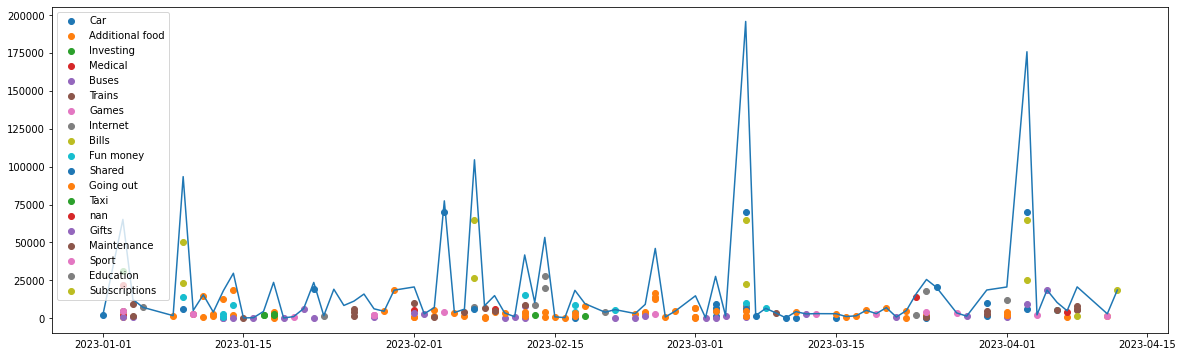

,date,id,amount,calculated_amount,category.id,category
0,2023-01-01,310,-1889,1889,15.0,0.0
1,2023-01-03,2120,-65166,65166,97.0,0.0
2,2023-01-04,888,-15867,12369,18.0,0.0
3,2023-01-05,291,-7150,7150,5.0,0.0
4,2023-01-08,289,-1699,1699,22.0,0.0
...,...,...,...,...,...,...
82,2023-04-06,29,-10390,10390,21.0,0.0
83,2023-04-07,23,-4898,4898,31.0,0.0
84,2023-04-08,33,-20653,20653,9.0,0.0
85,2023-04-11,7,-2900,2900,9.0,0.0


In [128]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,6))


for category in expenses_by_date['category.name'].unique():
        category_entries = expenses_by_date[expenses_by_date['category.name'] == category].sort_values(['date'])
        x = category_entries['date']
        y = category_entries['calculated_amount']

        print(x, y)
        # continue

        plt.scatter(x,y, label=category)

summary = expenses_by_date.groupby(['date'], as_index=False).sum().sort_values(['date'])
plt.plot(summary['date'], summary['calculated_amount'])

# plt.scatter(x, y, c='r', marker='s', label='Going out')
plt.legend(loc='upper left')
plt.show()

summary